# Mirror Bending Modes
*David Thomas 2019/07/01*

**Abstract:** We describe where the bending mode data we use in this code comes from and how we reformat it.

**Table of Contents:**
- [Raw Data](#Raw-Data)
- [Mapping Modes To Rectilinear Grid](#Mapping-Modes-To-Rectilinear-Grid)
- [Mapping Response To Rectilinear Grid](#Mapping-Response-To-Rectilinear-Grid)

## Raw Data
The raw data for the bending modes comes from the [IM code by Bo Xin](https://github.com/bxin/IM), specifically:    `data/M1M3/M1M3_1um_156_grid.txt`, and `data/M2/M2_1um_grid.DAT`. Here we examine these files a bit further and plot the first 20 bending modes for M1M3 and M2.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [2]:
m1m3_data = np.loadtxt('/Users/user/Code/IM/data/M1M3/M1M3_1um_156_grid.txt')
m1m3_x = m1m3_data[:, 1]
m1m3_y = m1m3_data[:, 2]
m1m3_zs = m1m3_data[:, 3:]
print(m1m3_x.shape, m1m3_y.shape, m1m3_zs.shape)

(5256,) (5256,) (5256, 156)


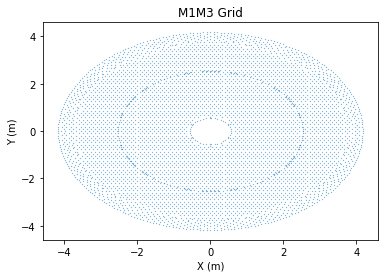

In [3]:
plt.title('M1M3 Grid')
plt.scatter(m1m3_x,m1m3_y,s=0.05)
plt.xlabel('X (m)')
plt.ylabel('Y (m)');

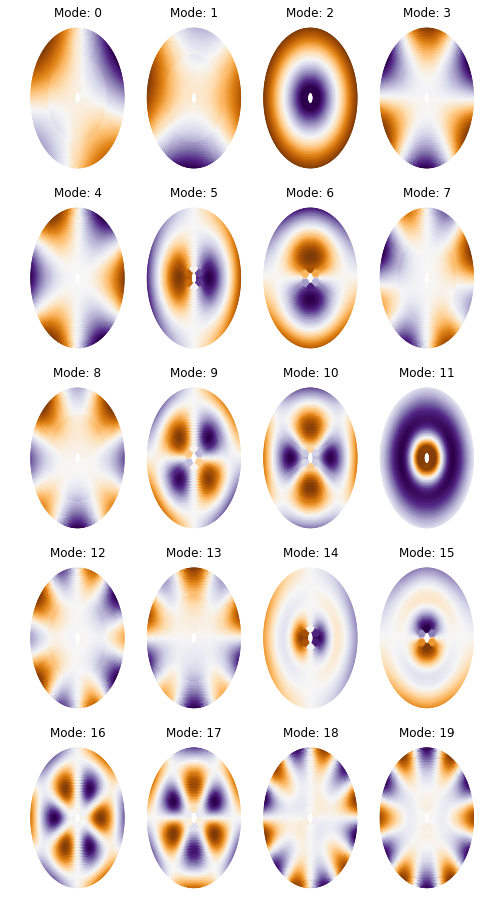

In [4]:
fig, axes = plt.subplots(5,4)
for row in range(5):
    for col in range(4):
        ax = axes[row,col]
        ax.set_title('Mode: {}'.format(row*4+col))
        ax.scatter(m1m3_x, m1m3_y, c=m1m3_zs[:,row*4+col], cmap='PuOr')
        ax.axis('off')
fig.set_size_inches((8,16))

In [5]:
m2_data = np.loadtxt('/Users/user/Code/IM/data/M2/M2_1um_grid.DAT')
m2_x = m2_data[:, 0]
m2_y = m2_data[:, 1]
m2_zs = m2_data[:, 2:]
print(m2_x.shape, m2_y.shape, m2_zs.shape)

(9084,) (9084,) (9084, 20)


Text(0,0.5,'Y (m)')

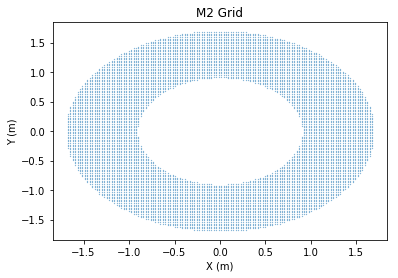

In [6]:
plt.title('M2 Grid')
plt.scatter(m2_x, m2_y,s=0.05)
plt.xlabel('X (m)')
plt.ylabel('Y (m)')

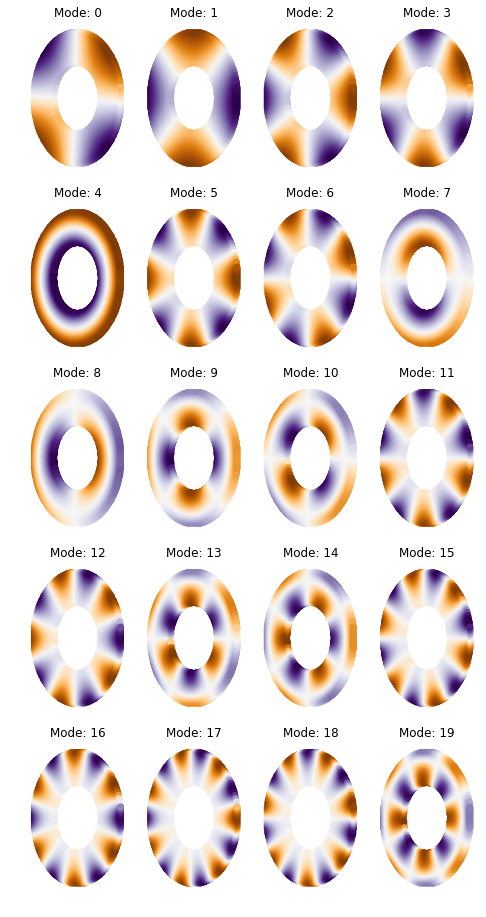

In [7]:
fig, axes = plt.subplots(5,4)
for row in range(5):
    for col in range(4):
        ax = axes[row,col]
        ax.set_title('Mode: {}'.format(row*4+col))
        ax.scatter(m2_x, m2_y, c=m2_zs[:,row*4+col], cmap='PuOr')
        ax.axis('off')
fig.set_size_inches((8,16))

## Mapping Modes To Rectilinear Grid

First we normalize.

In [8]:
m1m3_zs = m1m3_zs / np.abs(m1m3_zs).max()
m2_zs = m2_zs / np.abs(m2_zs).max()

It is better for raytracing engines to represent surfaces in rectilinear grids. This allows them to find the points where rays hit surfaces faster. Here we use interpolation to convert the bending modes into this format. Then we write the data files the code consumes.

In [9]:
from scipy.interpolate import griddata

In [10]:
nx = 200
nbend = 20

m1m3_radius = 4.18
grid = np.zeros((nx ** 2, 2))
x = np.linspace(-m1m3_radius, m1m3_radius, nx)
y = x
grid[:, 0] = np.repeat(x, nx)
grid[:, 1] = np.tile(y, nx)

m1m3_modes = np.zeros((nbend,nx,nx))
for i in range(nbend):
    m1m3_modes[i,:,:] = griddata((m1m3_x, m1m3_y), m1m3_zs[:,i], grid, method='cubic').reshape(nx, nx)

Mention how batoid adds surfaces.

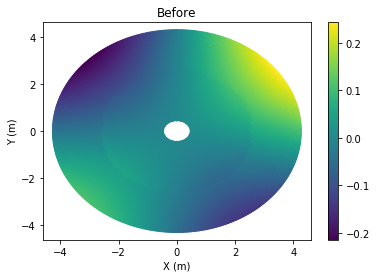

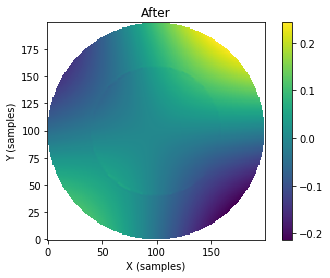

In [11]:
plt.figure()
plt.title('Before')
plt.scatter(m1m3_x, m1m3_y, c=m1m3_zs[:,0])
plt.xlabel('X (m)')
plt.ylabel('Y (m)')
plt.colorbar()

plt.figure()
plt.title('After')
plt.imshow(m1m3_modes[0], origin='lower')
plt.xlabel('X (samples)')
plt.ylabel('Y (samples)')
plt.colorbar();

In [12]:
np.save('../data/M1M3_grid_x', x)
np.save('../data/M1M3_grid_y', y)
np.save('../data/M1M3_bending_modes', m1m3_modes)

In [13]:
m2_radius = 1.71
grid = np.zeros((nx ** 2, 2))
x = np.linspace(-m2_radius, m2_radius, nx)
y = x
grid[:, 0] = np.repeat(x, nx)
grid[:, 1] = np.tile(y, nx)

m2_modes = np.zeros((nbend,nx,nx))
for i in range(nbend):
    m2_modes[i,:,:] = griddata((m2_x, m2_y), m2_zs[:,i], grid, method='cubic').reshape(nx, nx)

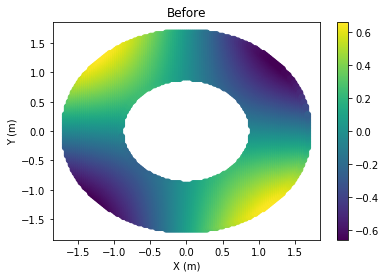

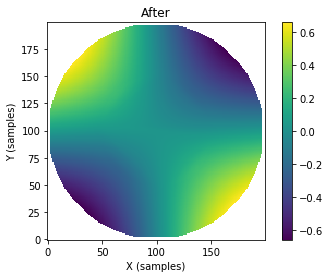

In [14]:
plt.figure()
plt.title('Before')
plt.scatter(m2_x, m2_y, c=m2_zs[:,0])
plt.xlabel('X (m)')
plt.ylabel('Y (m)')
plt.colorbar()

plt.figure()
plt.title('After')
plt.imshow(m2_modes[0], origin='lower')
plt.xlabel('X (samples)')
plt.ylabel('Y (samples)')
plt.colorbar();

In [15]:
np.save('../data/M2_grid_x', x)
np.save('../data/M2_grid_y', y)
np.save('../data/M2_bending_modes', m2_modes)